In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
bank_data=pd.read_csv("BankChurners.csv")

In [43]:
bank_data=bank_data.iloc[:,:-2]

In [44]:
#drooping Clientnum
bank_data.drop(columns="CLIENTNUM",inplace=True)


In [45]:
bank_data.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [47]:
x = bank_data.drop('Attrition_Flag', axis=1)
y = label_encoder.fit_transform(bank_data['Attrition_Flag'])


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3,random_state=0)

In [50]:
def data_preprocessor(X,y):
        """Function to Prepocess the data """
        numeric_transformer = Pipeline(
                steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
            )

        categorical_transformer = OneHotEncoder(handle_unknown="ignore")
        preprocessor = ColumnTransformer(
                transformers=[
                    ("numeric", numeric_transformer, X.select_dtypes(np.number).columns.tolist()),
                    ("category", categorical_transformer,X.select_dtypes("object").columns.tolist()),
                ]
            )
        return preprocessor

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest,f_regression


In [52]:
preprocessor=data_preprocessor(xtrain,ytrain)

In [53]:
    
feature_selector = Pipeline(
                        steps=[("preprocessor", preprocessor),
                        ("feature", SelectKBest(f_regression,k=10))])
feature_selector.fit(xtrain,ytrain)
xopt=feature_selector.get_feature_names_out()
print(xopt)


['numeric__Total_Relationship_Count' 'numeric__Months_Inactive_12_mon'
 'numeric__Contacts_Count_12_mon' 'numeric__Total_Revolving_Bal'
 'numeric__Total_Amt_Chng_Q4_Q1' 'numeric__Total_Trans_Amt'
 'numeric__Total_Trans_Ct' 'numeric__Total_Ct_Chng_Q4_Q1'
 'numeric__Avg_Utilization_Ratio' 'category__Gender_M']


In [54]:
x=bank_data[["Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Total_Revolving_Bal","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Gender"]]


In [55]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3,random_state=0)
preprocessor=data_preprocessor(xtrain,ytrain)

In [57]:

model_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                   
                    ("classifier", DecisionTreeClassifier())]
                 
                )
model_selector.fit(xtrain,ytrain)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender'])])),
                ('classifier', DecisionTreeClassifier())])

In [58]:
ypred_decision_tree=model_selector.predict(xtest)

The Accuracy of the Model is 93.25435998683777


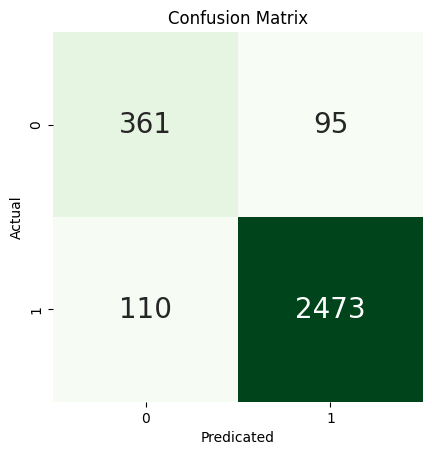

In [59]:
acuracy=accuracy_score(ytest,ypred_decision_tree)
print(f"The Accuracy of the Model is {acuracy*100}")
cmaxt=confusion_matrix(ytest,ypred_decision_tree,labels=[0,1])
sns_heat=sns.heatmap(cmaxt,cmap="Greens",annot=True, robust=True, cbar=False, square=True, annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [60]:
xopt

array(['numeric__Total_Relationship_Count',
       'numeric__Months_Inactive_12_mon',
       'numeric__Contacts_Count_12_mon', 'numeric__Total_Revolving_Bal',
       'numeric__Total_Amt_Chng_Q4_Q1', 'numeric__Total_Trans_Amt',
       'numeric__Total_Trans_Ct', 'numeric__Total_Ct_Chng_Q4_Q1',
       'numeric__Avg_Utilization_Ratio', 'category__Gender_M'],
      dtype=object)

In [61]:
custom_output=[{
    "Total_Relationship_Count":3,
    "Months_Inactive_12_mon":1,
    "Contacts_Count_12_mon":3,
    "Total_Revolving_Bal":777,
    "Total_Trans_Amt":1144,
    "Total_Amt_Chng_Q4_Q1":1.335,
    "Total_Trans_Ct":42,
    "Total_Ct_Chng_Q4_Q1":1.625,
    "Avg_Utilization_Ratio":0.65,
    "Gender":"M",

}]
output=pd.DataFrame(custom_output)
model_selector.predict(output)

array([1])